<a href="https://colab.research.google.com/github/ijinshes2ly/PCA/blob/main/GM_D28_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


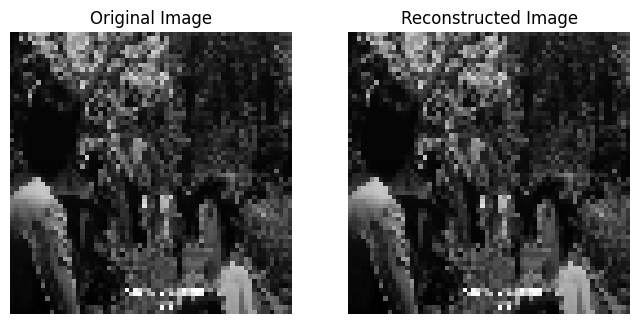

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


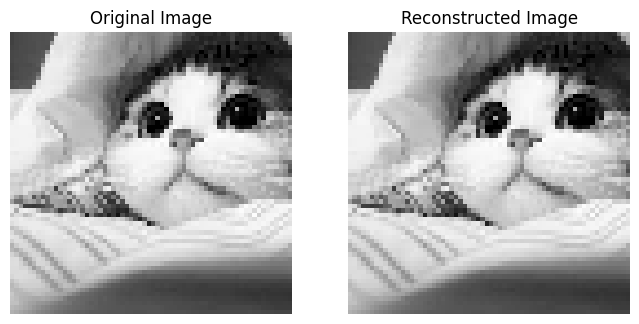

In [ ]:
!pip install scikit-learn opencv-python matplotlib

import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


# 1. 이미지 로드 및 전처리
def load_image(image_path, target_size=(64, 64)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # 이미지 흑백 변환
    img_resized = cv2.resize(img, target_size)  # 이미지 크기 조정
    return img_resized

# 2. 이미지 차원 축소 및 복원
def reduce_and_reconstruct_image(image, n_components=1):
    pca = PCA(n_components=n_components)
    original_shape = image.shape
    image_flattened = image.flatten().reshape(1, -1)  # 이미지를 1차원 벡터로 변환

    # PCA 차원 축소
    image_reduced = pca.fit_transform(image_flattened)

    # 복원
    image_reconstructed = pca.inverse_transform(image_reduced)
    image_reconstructed = image_reconstructed.reshape(original_shape)  # 원래 이미지 형태로 복원

    return image_reconstructed

# 3. 이미지 저장 및 시각화
def save_and_display_images(original_image, reconstructed_image, output_path='reconstructed_image.png'):
    # 이미지 저장
    cv2.imwrite(output_path, reconstructed_image)

    # 시각화
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title('Reconstructed Image')
    plt.axis('off')

    plt.show()

# 4. 메인 실행 함수
def main(image_path, output_path='reconstructed_image.png', n_components=1):
    original_image = load_image(image_path)
    reconstructed_image = reduce_and_reconstruct_image(original_image, n_components=n_components)
    save_and_display_images(original_image, reconstructed_image, output_path)

# 예제 실행
image_path = '/content/1.png'  # 입력 이미지 경로를 설정합니다.
main(image_path)

image_path = '/content/스크린샷 2025-03-10 150857.png'  # 입력 이미지 경로를 설정합니다.
main(image_path)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 53.2 MB/s eta 0:00:00


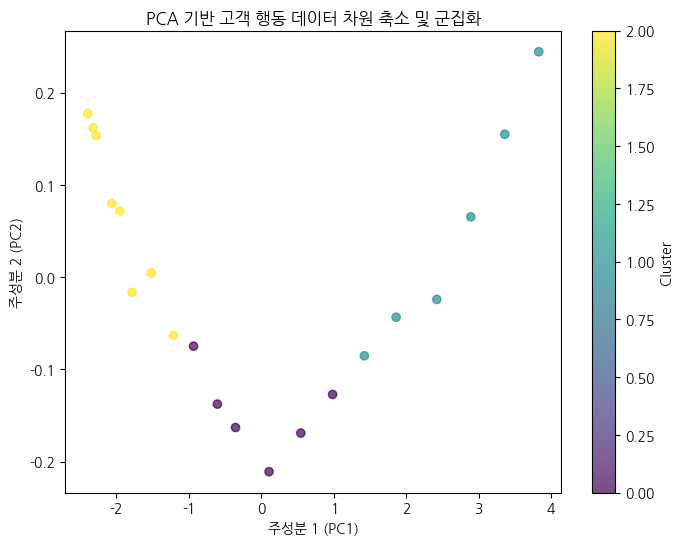

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
!pip install koreanize-matplotlib
import koreanize_matplotlib
# 하드 코딩된 고객 행동 데이터 (그로스 마케팅)
data = {
    "Page_Visits": [15, 25, 30, 80, 95, 120, 150, 200, 250, 300,
                    320, 400, 450, 500, 550, 600, 700, 750, 800, 850],
    "Ad_Clicks": [1, 3, 5, 10, 12, 20, 25, 35, 40, 50,
                  60, 70, 80, 90, 100, 110, 120, 130, 140, 150],
    "Purchases": [0, 1, 1, 3, 5, 6, 10, 12, 15, 18,
                  20, 25, 30, 35, 40, 45, 50, 55, 60, 65],
    "Revenue": [50, 80, 120, 200, 250, 300, 500, 700, 900, 1100,
                1300, 1600, 2000, 2400, 2800, 3200, 3700, 4200, 4700, 5200]
}#4차원 데이터

# 데이터프레임 변환
df = pd.DataFrame(data)

# 데이터 정규화 (PCA를 위해 필수)
scaler = StandardScaler()#각 특성이 다른 단위를 가지므로, 평균을 0, 표준편차를 1로 변환
scaled_data = scaler.fit_transform(df)

# PCA 적용 (2차원으로 축소)# 4차원 데이터에서 주성분 뽑아서 2차원데이터로 만듦
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)#정규화된 데이터를 PCA 넣어서 4차원데이터를 2차원으로 축소하는 과정이 자동으로 실행.
                                           # PCA가 가장중요한 2개의 주성분을 찾아줌.
# 변환된 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2']) #찾은 2개의 주성분을 각각 PC1,PC2로 컬럼이름 변경

# K-means를 이용한 고객 군집화 (3개 그룹)
kmeans = KMeans(n_clusters=3, random_state=42) # PCA 변환된 데이터를 3개 그룹으로 자동 분할
df_pca['Cluster'] = kmeans.fit_predict(df_pca)#PCA 변환된 데이터(df_pca)를 보고 가장 적절한 클러스터를 자동으로 찾음
                                              #각 데이터가 속하는 클러스를 Cluster 컬럼에 저장

# 차원 축소된 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("주성분 1 (PC1)")
plt.ylabel("주성분 2 (PC2)")
plt.title("PCA 기반 고객 행동 데이터 차원 축소 및 군집화")
plt.colorbar(label="Cluster")
plt.show()


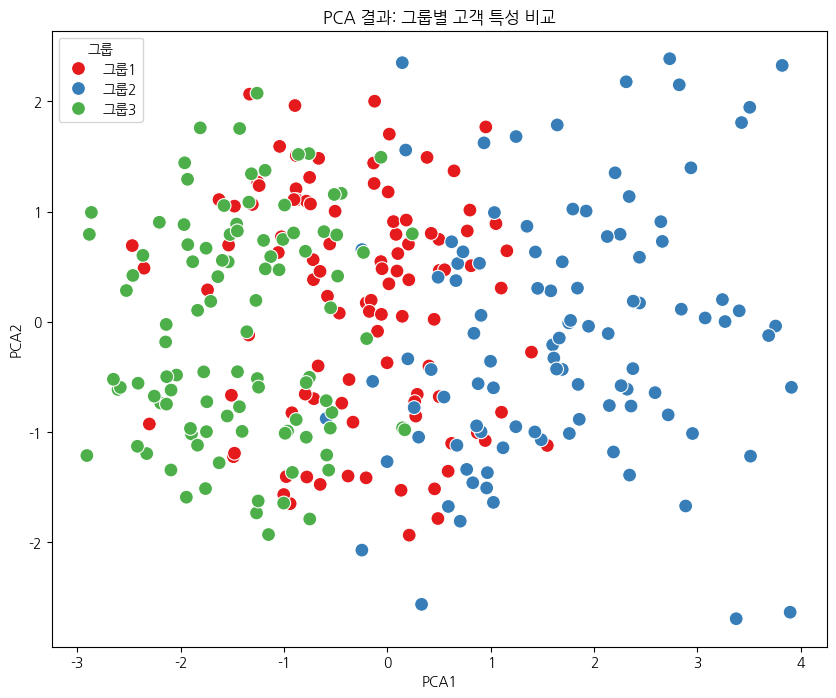

,총 구매 금액,월 평균 방문 횟수,방문당 평균 구매 금액,할인 쿠폰 사용 횟수,구매한 상품 종류 수,리뷰 작성 횟수,반품 횟수,VIP 회원 여부,평균 결제 시간,온라인 구매 비율
PC1,0.421796,0.189904,0.334294,0.375226,0.213160,0.387150,0.380734,-0.021346,0.368254,0.239020
PC2,-0.088819,-0.124876,0.105437,-0.069310,0.522217,-0.067409,-0.023672,0.763179,0.156933,-0.275157
PC3,-0.049459,0.772598,-0.193622,0.005428,0.004687,0.101741,-0.376024,0.286945,-0.099774,0.345061


In [15]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
!pip install koreanize-matplotlib
import koreanize_matplotlib

# 10차원의 가상 데이터셋 3개 생성
data1 = {
    '총 구매 금액': np.random.normal(500000, 200000, 100),  # 고객의 총 구매 금액
    '월 평균 방문 횟수': np.random.normal(10, 5, 100),    # 고객의 월 평균 상점 방문 횟수
    '방문당 평균 구매 금액': np.random.normal(50000, 20000, 100),  # 한 번 방문 시 평균 구매 금액
    '할인 쿠폰 사용 횟수': np.random.normal(3, 1, 100),    # 고객이 할인 쿠폰을 사용한 횟수
    '구매한 상품 종류 수': np.random.normal(5, 2, 100),    # 서로 다른 상품 카테고리 수
    '리뷰 작성 횟수': np.random.normal(10, 5, 100),        # 작성한 리뷰 수
    '반품 횟수': np.random.normal(1, 1, 100),              # 고객의 반품 횟수
    'VIP 회원 여부': np.random.randint(0, 2, 100),          # VIP 회원 여부 (0: 일반, 1: VIP)
    '평균 결제 시간': np.random.normal(15, 5, 100),        # 결제 시 소요되는 평균 시간 (분)
    '온라인 구매 비율': np.random.normal(30, 10, 100)       # 전체 구매 중 온라인 구매 비율 (%)
}

data2 = {
    '총 구매 금액': np.random.normal(700000, 250000, 100),
    '월 평균 방문 횟수': np.random.normal(12, 6, 100),
    '방문당 평균 구매 금액': np.random.normal(60000, 25000, 100),
    '할인 쿠폰 사용 횟수': np.random.normal(4, 2, 100),
    '구매한 상품 종류 수': np.random.normal(6, 3, 100),
    '리뷰 작성 횟수': np.random.normal(15, 6, 100),
    '반품 횟수': np.random.normal(2, 1, 100),
    'VIP 회원 여부': np.random.randint(0, 2, 100),
    '평균 결제 시간': np.random.normal(18, 6, 100),
    '온라인 구매 비율': np.random.normal(35, 12, 100)
}

data3 = {
    '총 구매 금액': np.random.normal(400000, 150000, 100),
    '월 평균 방문 횟수': np.random.normal(8, 4, 100),
    '방문당 평균 구매 금액': np.random.normal(40000, 15000, 100),
    '할인 쿠폰 사용 횟수': np.random.normal(2, 1, 100),
    '구매한 상품 종류 수': np.random.normal(4, 2, 100),
    '리뷰 작성 횟수': np.random.normal(8, 3, 100),
    '반품 횟수': np.random.normal(1, 0.5, 100),
    'VIP 회원 여부': np.random.randint(0, 2, 100),
    '평균 결제 시간': np.random.normal(12, 4, 100),
    '온라인 구매 비율': np.random.normal(25, 8, 100)
}
 #데이터 프레임 생성
df1=pd.DataFrame(data1)
df2=pd.DataFrame(data2)
df3=pd.DataFrame(data3)

#그룹정보추가 # 데이터 포인트가 어떤 데이터셋에서 왔는지 구분하기 위함.
df1['그룹'] = '그룹1'
df2['그룹'] = '그룹2'
df3['그룹'] = '그룹3'

# 데이터프레임 합치기
df = pd.concat([df1, df2, df3], ignore_index=True)

#데이터 정규화('그룹'열 제)
features=df.drop('그룹', axis =1)
scaler = StandardScaler()
scaler_data = scaler.fit_transform(features)

#차원축소
pca = PCA(n_components = 3)
pca_result= pca.fit_transform(scaler_data)

#데이터 프레임변환
df_pca = pd.DataFrame(pca_result, columns=['PCA1','PCA2','PCA3'])

#시각화 위해서 다시 '그룹'열 추가
df_pca['그룹'] = df['그룹']

# PCA 결과 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='그룹', palette='Set1', s=100)
plt.title('PCA 결과: 그룹별 고객 특성 비교')
plt.show()

# PCA 주성분 로딩 출력
loadings = pd.DataFrame(pca.components_, columns=features.columns, index=['PC1', 'PC2','PC3'])
display(loadings)

     Customer_ID  Page_Visits  Ad_Clicks  Purchases   Revenue  \
PC1     0.004463    -0.395613   0.119534   0.498136  0.095124   
PC2     0.295379     0.348952   0.592530  -0.110707 -0.482504   

     Session_Duration  Bounce_Rate  Email_Opens  Loyalty_Score  
PC1         -0.045199    -0.511491     0.536836      -0.141896  
PC2         -0.256109    -0.136357     0.073773      -0.324343  


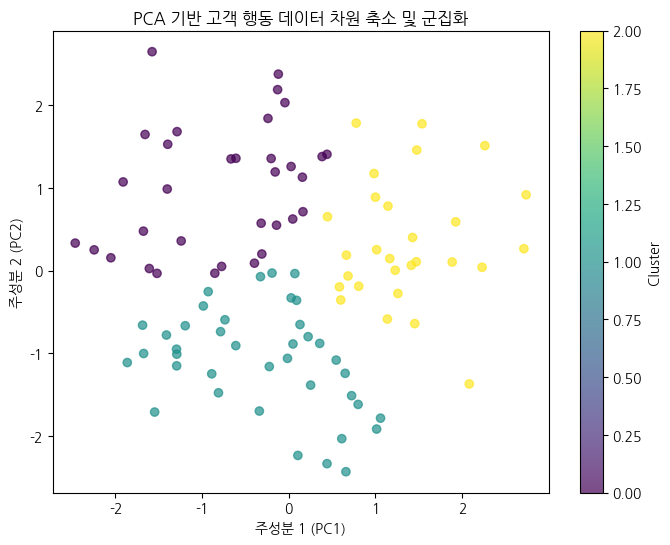

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
!pip install koreanize-matplotlib
import koreanize_matplotlib
# 하드 코딩된 고객 행동 데이터 (그로스 마케팅)
df= pd.read_csv('customer_segmentation (1).csv')

# 데이터 정규화 (PCA를 위해 필수)
scaler = StandardScaler()#각 특성이 다른 단위를 가지므로, 평균을 0, 표준편차를 1로 변환
scaled_data = scaler.fit_transform(df)

# PCA 적용 (2차원으로 축소)# 4차원 데이터에서 주성분 뽑아서 2차원데이터로 만듦
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)#정규화된 데이터를 PCA 넣어서 4차원데이터를 2차원으로 축소하는 과정이 자동으로 실행.
                                           # PCA가 가장중요한 2개의 주성분을 찾아줌.
# 변환된 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2']) #찾은 2개의 주성분을 각각 PC1,PC2로 컬럼이름 변경

# PCA 주성분 로딩 출력
loadings = pd.DataFrame(pca.components_, columns=df.columns, index=['PC1', 'PC2'])
print(loadings)

# K-means를 이용한 고객 군집화 (3개 그룹)
kmeans = KMeans(n_clusters=3, random_state=42) # PCA 변환된 데이터를 3개 그룹으로 자동 분할
df_pca['Cluster'] = kmeans.fit_predict(df_pca)#PCA 변환된 데이터(df_pca)를 보고 가장 적절한 클러스터를 자동으로 찾음
                                              #각 데이터가 속하는 클러스를 Cluster 컬럼에 저장

# 차원 축소된 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("주성분 1 (PC1)")
plt.ylabel("주성분 2 (PC2)")
plt.title("PCA 기반 고객 행동 데이터 차원 축소 및 군집화")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
# PCA 주성분 로딩 출력
loadings = pd.DataFrame(pca.components_, columns=df.columns, index=['PC1', 'PC2'])
print(loadings)


     Customer_ID  Page_Visits  Ad_Clicks  Purchases   Revenue  \
PC1     0.004463    -0.395613   0.119534   0.498136  0.095124   
PC2     0.295379     0.348952   0.592530  -0.110707 -0.482504   

     Session_Duration  Bounce_Rate  Email_Opens  Loyalty_Score  
PC1         -0.045199    -0.511491     0.536836      -0.141896  
PC2         -0.256109    -0.136357     0.073773      -0.324343  
